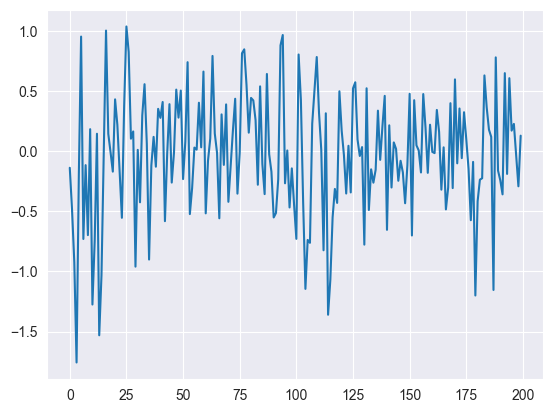

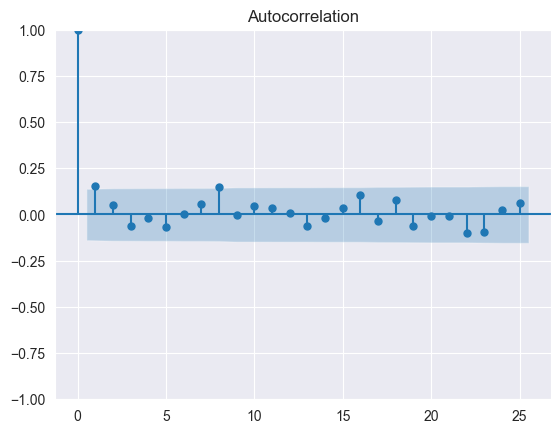

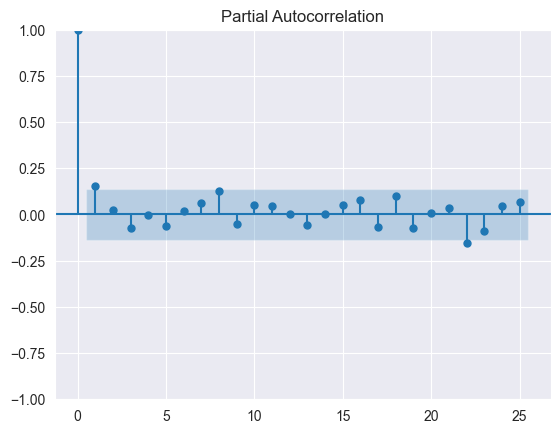

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('Homework_1_DATA.csv', sep = ";", decimal = ",")
series1 = data.iloc[:300,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

y = series5

num_lags=25 # to discuss

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags,method="ols")
plt.show()

In [136]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)

Mean -0.03206 Standard deviation 0.500573917019255 Skewness -0.48020706258979906 Kurtosis 0.5098687494917451


In [137]:
from statsmodels.tsa.stattools import adfuller

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = adfuller(y,maxlag=10) 
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -12.007153654203096
p-value: 3.2438534047734954e-22


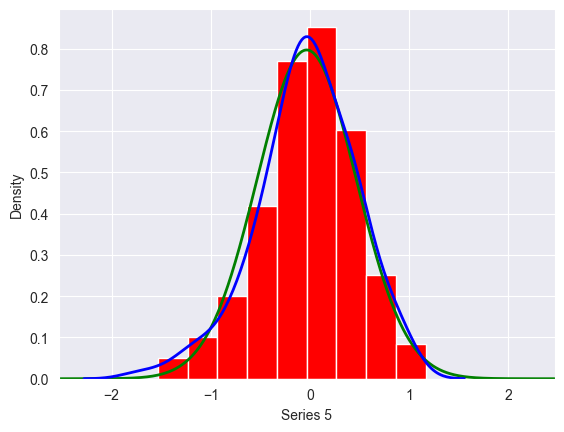

In [138]:
import seaborn as sns
import scipy.stats as st

mu = np.mean(y)
sigma = np.std(y)
x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()

In [139]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(y)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

#Correlation test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(y, lags=[20])
box_test

Saphiro ShapiroResult(statistic=0.9836111664772034, pvalue=0.01984090358018875)


,lb_stat,lb_pvalue
20,19.50123,0.489493


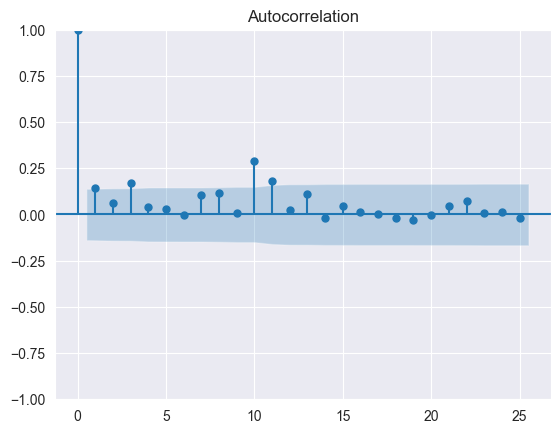

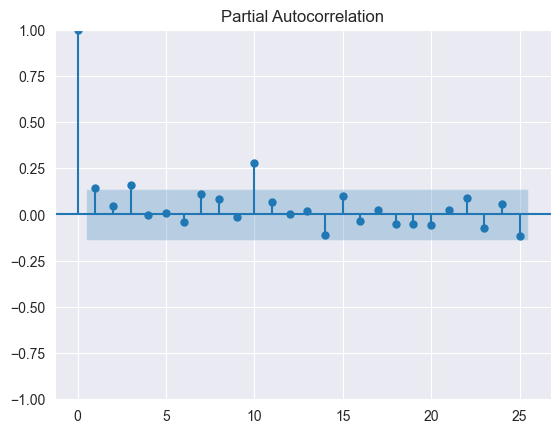

In [140]:
# plt.plot(y**2)
# plt.show()
plot_acf(y**2,lags=num_lags)
plt.show()
plot_pacf(y**2,lags=num_lags,method="ols")
plt.show()

In [141]:
box_test2 = sm.stats.acorr_ljungbox(y**2, lags=[20])
print("Ljung-Box for the squares") 
box_test2

Ljung-Box for the squares


,lb_stat,lb_pvalue
20,44.962343,0.001117


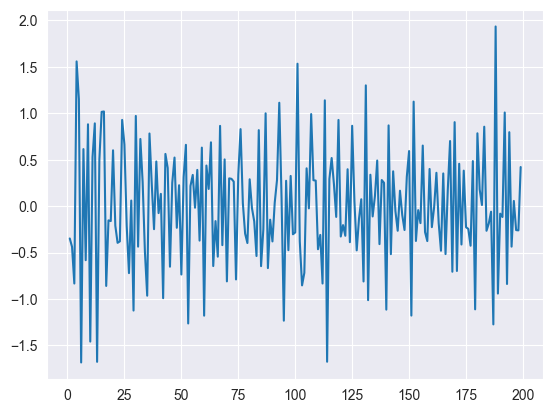

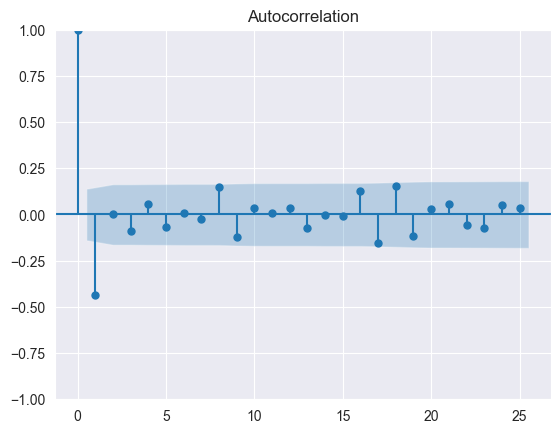

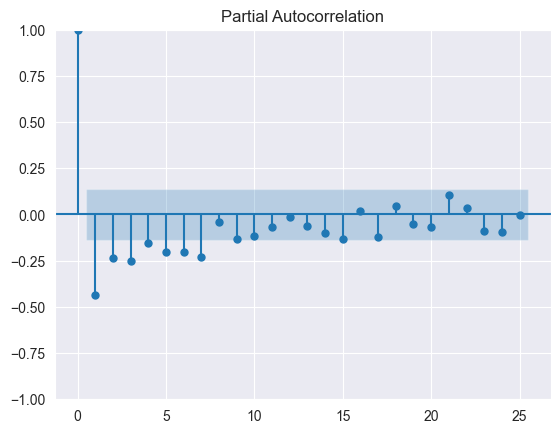

In [142]:
# In case we have to take some differences to the original series
z = y.diff().dropna()
# zz = y.diff(1).diff(1).dropna() # in case we need two differences
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [143]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(z)
std = np.std(z)
kurtosis = kurtosis(z)
skewness = skew(z)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)

Mean 0.0013417085427135707 Standard deviation 0.6523836570600853 Skewness -0.040595484976154006 Kurtosis -0.044665505026729946


In [144]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(z,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the transformed series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the transformed series
Statistic Value: -7.804137631278835
p-value: 7.35838196834154e-12


In [145]:
# Import the statsmodels.stats.diagnostic module
import statsmodels.stats.diagnostic as diag

# Use the appropriate function from the module
box_test_1 = diag.acorr_ljungbox(z, lags=[20])
print("Ljung-Box for z") 
print(box_test_1)

box_test_2 = diag.acorr_ljungbox(z**2, lags=[20])
print("Ljung-Box for z**2") 
print(box_test_2)

#print("Box test z",box_test_1)
#print("Box test z**2",box_test_2)
#print("Ljung-Box: Statistic value", box_test_1[0], "p-value", box_test_1[1]) 
#print("Ljung-Box: Statistic value", box_test_2[0], "p-value", box_test_2[1]) 

Ljung-Box for z
      lb_stat     lb_pvalue
20  68.558711  3.125638e-07
Ljung-Box for z**2
      lb_stat  lb_pvalue
20  23.878859   0.247724


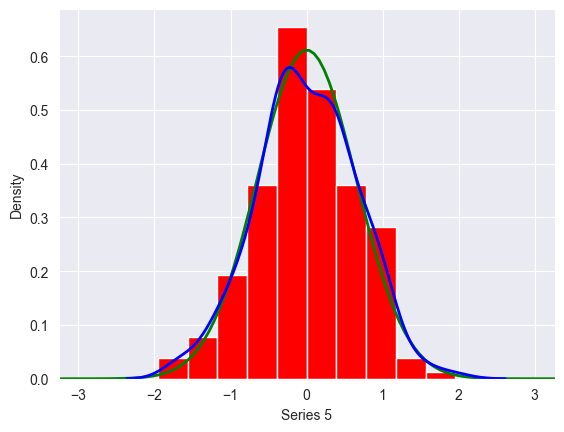

Saphiro ShapiroResult(statistic=0.9949080348014832, pvalue=0.7396892309188843)


In [146]:
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

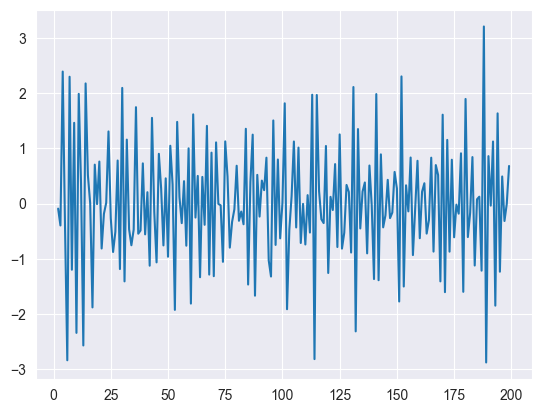

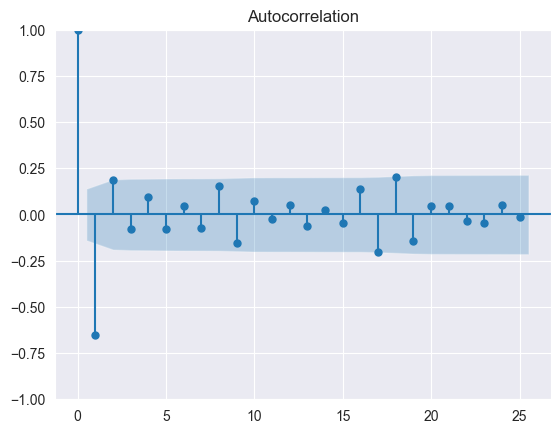

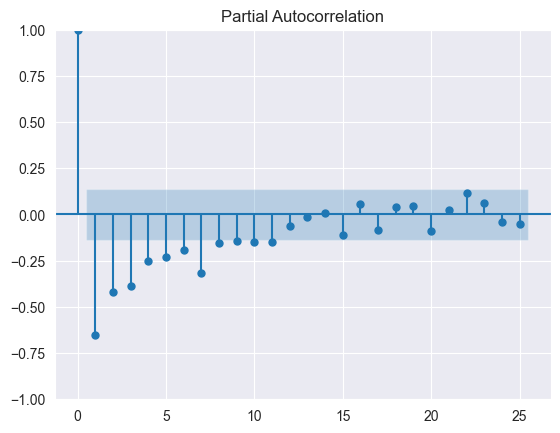

In [147]:
# In case we have to take some differences to the original series

zz = y.diff(1).diff(1).dropna() # in case we need two differences
plt.plot(zz)
plt.show()
plot_acf(zz,lags=num_lags)
plt.show()
plot_pacf(zz,lags=num_lags)
plt.show()

In [148]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(zz,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the transformed series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the transformed series
Statistic Value: -9.931130787838951
p-value: 2.821017618408916e-17


In [149]:
# Import the statsmodels.stats.diagnostic module
import statsmodels.stats.diagnostic as diag

# Use the appropriate function from the module
box_test_1 = diag.acorr_ljungbox(zz, lags=[20])
print("Ljung-Box for zz") 
print(box_test_1)

box_test_2 = diag.acorr_ljungbox(zz**2, lags=[20])
print("Ljung-Box for zz**2") 
print(box_test_2)

#print("Box test zz",box_test_1)
#print("Box test zz**2",box_test_2)
#print("Ljung-Box: Statistic value", box_test_1[0], "p-value", box_test_1[1]) 
#print("Ljung-Box: Statistic value", box_test_2[0], "p-value", box_test_2[1]) 

Ljung-Box for zz
       lb_stat     lb_pvalue
20  138.645144  9.142374e-20
Ljung-Box for zz**2
      lb_stat  lb_pvalue
20  48.180215   0.000401


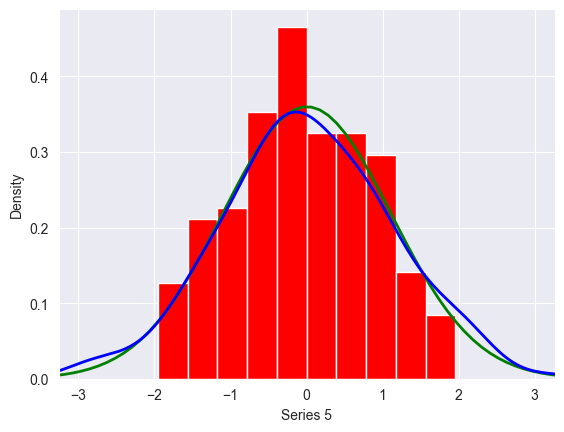

Saphiro ShapiroResult(statistic=0.9963522553443909, pvalue=0.9221044778823853)


In [150]:
mu = np.mean(zz)
sigma = np.std(zz)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(zz,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(zz, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(zz)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

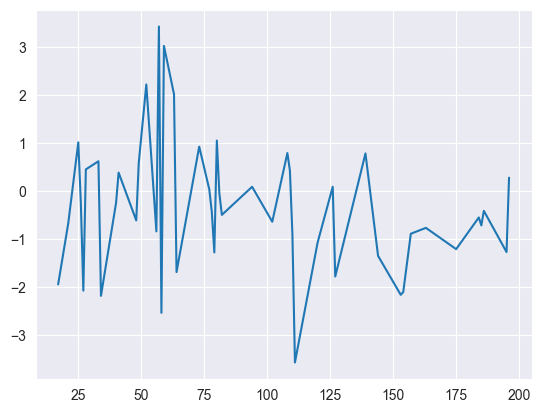

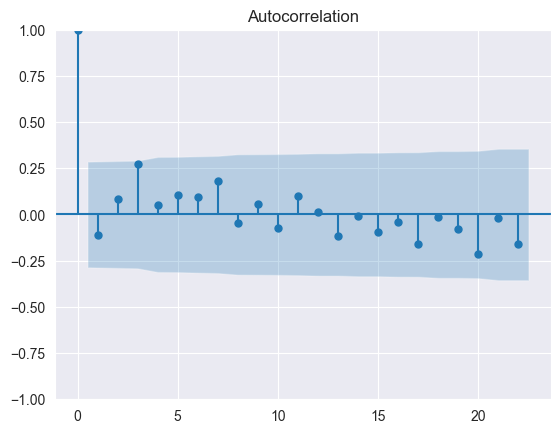

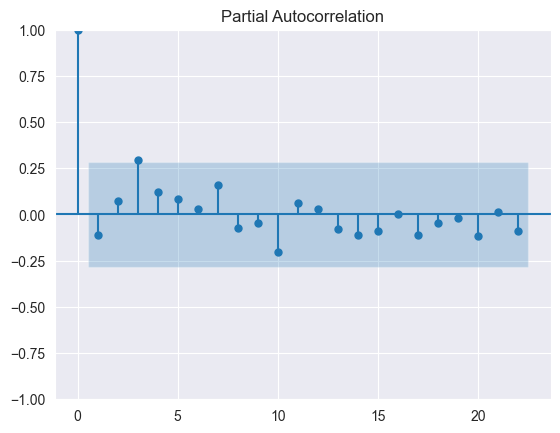

In [151]:
returns = np.log(y).diff().dropna() # we take log first and then one differente, diff(log(spot))
zz = returns
#z = y.diff().dropna()
num_lags = 22

plt.plot(zz)
plt.show()
plot_acf(zz,lags=num_lags)
plt.show()
plot_pacf(zz,lags=num_lags)
plt.show()

In [152]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(zz,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the transformed series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the transformed series
Statistic Value: -2.584934917605888
p-value: 0.09615105993650913


In [153]:
# Import the statsmodels.stats.diagnostic module
import statsmodels.stats.diagnostic as diag

# Use the appropriate function from the module
box_test_1 = diag.acorr_ljungbox(zz, lags=[20])
print("Ljung-Box for zz") 
print(box_test_1)

box_test_2 = diag.acorr_ljungbox(zz**2, lags=[20])
print("Ljung-Box for zz**2") 
print(box_test_2)

#print("Box test zz",box_test_1)
#print("Box test zz**2",box_test_2)
#print("Ljung-Box: Statistic value", box_test_1[0], "p-value", box_test_1[1]) 
#print("Ljung-Box: Statistic value", box_test_2[0], "p-value", box_test_2[1]) 

Ljung-Box for zz
      lb_stat  lb_pvalue
20  17.533684   0.618097
Ljung-Box for zz**2
      lb_stat  lb_pvalue
20  26.558842   0.148138


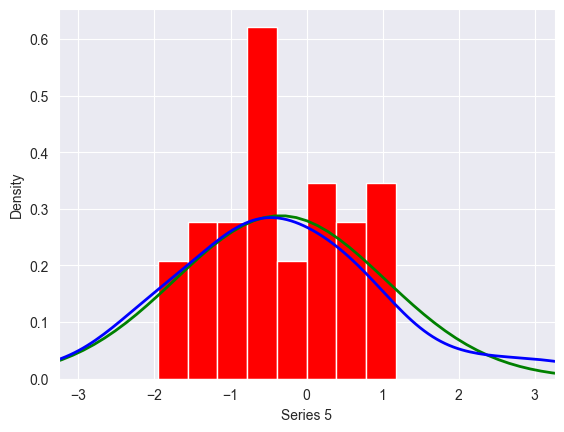

Saphiro ShapiroResult(statistic=0.9760391712188721, pvalue=0.44015687704086304)


In [154]:
mu = np.mean(zz)
sigma = np.std(zz)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(zz,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(zz, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(zz)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"